<a href="https://colab.research.google.com/github/ErikaCA99/Proyecto-de-IA---Postulacion-a-la-SCESI/blob/main/DEMANDA_DE_PRODUCTOS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PROYECTO DE PREDICCIÓN DE DEMANDA DE PRODUCTOS**

Este proyecto se centra en anticipar la demanda futura de productos con el objetivo de optimizar la gestión del inventario y la cadena de suministro de un supermercado o tienda. Utilizando técnicas de ciencia de datos e inteligencia artificial, se realizara un analisis de los datos históricos de ventas y otros factores relevantes para crear un modelo predictivo. Este modelo permite a los supermercados prever las necesidades de inventario, reducir costos de almacenamiento y mejorar la satisfacción del cliente al asegurar la disponibilidad de productos.

**CARGA DE LIBRERIAS**

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
%matplotlib inline

**CARGA DE DATOS**

In [38]:
# Subiendo el dataset desde la computadora
from google.colab import files
uploaded = files.upload()

In [39]:
df = pd.read_csv('amazon.csv')

In [40]:
df

product_id                                       product_name  \
0     B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1     B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2     B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
3     B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4     B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   
...          ...                                                ...   
1460  B08L7J3T31  Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...   
1461  B01M6453MB  Prestige Delight PRWO Electric Rice Cooker (1 ...   
1462  B009P2LIL4  Bajaj Majesty RX10 2000 Watts Heat Convector R...   
1463  B00J5DYCCA  Havells Ventil Air DSP 230mm Exhaust Fan (Pist...   
1464  B01486F4G6  Borosil Jumbo 1000-Watt Grill Sandwich Maker (...   

                                               category discounted_price  \
0     Computers&Accessories|Accessories&Peripherals|...             ₹399   
1     Computers&Accessories|Accessories&Peripherals|...             ₹199   
2     Computers&Accessories|Accessories&Peripherals|...             ₹199   
3     Computers&Accessories|Accessories&Peripherals|...             ₹329   
4     Computers&Accessories|Accessories&Peripherals|...             ₹154   
...                                                 ...              ...   
1460  Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...             ₹379   
1461  Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...           ₹2,280   
1462  Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...           ₹2,219   
1463  Home&Kitchen|Heating,Cooling&AirQuality|Fans|E...           ₹1,399   
1464  Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...           ₹2,863   

     actual_price discount_percentage rating rating_count  \
0          ₹1,099                 64%    4.2       24,269   
1            ₹349                 43%    4.0       43,994   
2          ₹1,899                 90%    3.9        7,928   
3            ₹699                 53%    4.2       94,363   
4            ₹399                 61%    4.2       16,905   
...           ...                 ...    ...          ...   
1460         ₹919                 59%      4        1,090   
1461       ₹3,045                 25%    4.1        4,118   
1462       ₹3,080                 28%    3.6          468   
1463       ₹1,890                 26%      4        8,031   
1464       ₹3,690                 22%    4.3        6,987   

                                          about_product  \
0     High Compatibility : Compatible With iPhone 12...   
1     Compatible with all Type C enabled devices, be...   
2     【 Fast Charger& Data Sync】-With built-in safet...   
3     The boAt Deuce USB 300 2 in 1 cable is compati...   
4     [CHARGE & SYNC FUNCTION]- This cable comes wit...   
...                                                 ...   
1460  SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...   
1461                       230 Volts, 400 watts, 1 Year   
1462  International design and styling|Two heat sett...   
1463  Fan sweep area: 230 MM ; Noise level: (40 - 45...   
1464  Brand-Borosil, Specification â€“ 23V ~ 5Hz;1 W...   

                                                user_id  \
0     AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...   
1     AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...   
2     AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...   
3     AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...   
4     AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...   
...                                                 ...   
1460  AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...   
1461  AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...   
1462  AGVPWCMAHYQWJOQKMUJN4DW3KM5Q,AF4Q3E66MY4SR7YQZ...   
1463  AF2JQCLSCY3QJATWUNNHUSVUPNQQ,AFDMLUXC5LS5RXDJS...   
1464  AFGW5PT3R6ZAVQR4Y5MWVAKBZAYA,AG7QNJ2SCS5VS5VYY...   

                                              user_name  \
0     Manav,Adarsh gupta,Sunde

**BUSSINESS ANALYTICS:**

MOSTRANDO DATOS DEL DATASET AMAZON

In [41]:
# Mostrar las primeras filas del Dataset
print(df.head())

   product_id                                       product_name  \
0  B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1  B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2  B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
3  B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4  B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   

                                            category discounted_price  \
0  Computers&Accessories|Accessories&Peripherals|...             ₹399   
1  Computers&Accessories|Accessories&Peripherals|...             ₹199   
2  Computers&Accessories|Accessories&Peripherals|...             ₹199   
3  Computers&Accessories|Accessories&Peripherals|...             ₹329   
4  Computers&Accessories|Accessories&Peripherals|...             ₹154   

  actual_price discount_percentage rating rating_count  \
0       ₹1,099                 64%    4.2       24,269   
1         ₹349                 43%  

In [42]:
# Mostrar información general del Dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

In [43]:
print(df.describe())

        product_id                                       product_name  \
count         1465                                               1465   
unique        1351                                               1337   
top     B07JW9H4J1  Fire-Boltt Ninja Call Pro Plus 1.83" Smart Wat...   
freq             3                                                  5   

                                                 category discounted_price  \
count                                                1465             1465   
unique                                                211              550   
top     Computers&Accessories|Accessories&Peripherals|...             ₹199   
freq                                                  233               53   

       actual_price discount_percentage rating rating_count  \
count          1465                1465   1465         1463   
unique          449                  92     28         1143   
top            ₹999                 50%    4.1        

In [44]:
# Mostrar los nombres de los features
print(df.columns)

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')


ANALISIS DE NULOS

In [12]:
df.isna().sum().sort_values(ascending=False)

rating_count           2
product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

Conclusion: rating count contiene 2 valores nulos

In [13]:
df.dropna(subset=['rating_count'])

product_id                                       product_name  \
0     B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1     B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2     B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
3     B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4     B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   
...          ...                                                ...   
1460  B08L7J3T31  Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...   
1461  B01M6453MB  Prestige Delight PRWO Electric Rice Cooker (1 ...   
1462  B009P2LIL4  Bajaj Majesty RX10 2000 Watts Heat Convector R...   
1463  B00J5DYCCA  Havells Ventil Air DSP 230mm Exhaust Fan (Pist...   
1464  B01486F4G6  Borosil Jumbo 1000-Watt Grill Sandwich Maker (...   

                                               category discounted_price  \
0     Computers&Accessories|Accessories&Peripherals|...             ₹399   
1     Computers&Accessories|Accessories&Peripherals|...             ₹199   
2     Computers&Accessories|Accessories&Peripherals|...             ₹199   
3     Computers&Accessories|Accessories&Peripherals|...             ₹329   
4     Computers&Accessories|Accessories&Peripherals|...             ₹154   
...                                                 ...              ...   
1460  Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...             ₹379   
1461  Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...           ₹2,280   
1462  Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...           ₹2,219   
1463  Home&Kitchen|Heating,Cooling&AirQuality|Fans|E...           ₹1,399   
1464  Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...           ₹2,863   

     actual_price discount_percentage rating rating_count  \
0          ₹1,099                 64%    4.2       24,269   
1            ₹349                 43%    4.0       43,994   
2          ₹1,899                 90%    3.9        7,928   
3            ₹699                 53%    4.2       94,363   
4            ₹399                 61%    4.2       16,905   
...           ...                 ...    ...          ...   
1460         ₹919                 59%      4        1,090   
1461       ₹3,045                 25%    4.1        4,118   
1462       ₹3,080                 28%    3.6          468   
1463       ₹1,890                 26%      4        8,031   
1464       ₹3,690                 22%    4.3        6,987   

                                          about_product  \
0     High Compatibility : Compatible With iPhone 12...   
1     Compatible with all Type C enabled devices, be...   
2     【 Fast Charger& Data Sync】-With built-in safet...   
3     The boAt Deuce USB 300 2 in 1 cable is compati...   
4     [CHARGE & SYNC FUNCTION]- This cable comes wit...   
...                                                 ...   
1460  SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...   
1461                       230 Volts, 400 watts, 1 Year   
1462  International design and styling|Two heat sett...   
1463  Fan sweep area: 230 MM ; Noise level: (40 - 45...   
1464  Brand-Borosil, Specification â€“ 23V ~ 5Hz;1 W...   

                                                user_id  \
0     AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...   
1     AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...   
2     AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...   
3     AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...   
4     AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...   
...                                                 ...   
1460  AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...   
1461  AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...   
1462  AGVPWCMAHYQWJOQKMUJN4DW3KM5Q,AF4Q3E66MY4SR7YQZ...   
1463  AF2JQCLSCY3QJATWUNNHUSVUPNQQ,AFDMLUXC5LS5RXDJS...   
1464  AFGW5PT3R6ZAVQR4Y5MWVAKBZAYA,AG7QNJ2SCS5VS5VYY...   

                                              user_name  \
0     Manav,Adarsh gupta,Sunde

In [36]:
# Verificar la limpieza
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 326 entries, 20 to 1462
Columns: 702 entries, product_id to user_name_🤘🏻🤘🏻,Kabi,Manoj kumar ware,om,Hemant Kumar,pawan r.,Anshu,Pavan kamar
dtypes: bool(689), float64(5), object(8)
memory usage: 255.0+ KB
None


**LIMPIEZA DE DATOS**

In [35]:
# Convertir columnas numéricas que están en formato de string
df['discounted_price'] = pd.to_numeric(df['discounted_price'], errors='coerce')
df['actual_price'] = pd.to_numeric(df['actual_price'], errors='coerce')
df['discount_percentage'] = pd.to_numeric(df['discount_percentage'], errors='coerce')
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
df['rating_count'] = pd.to_numeric(df['rating_count'], errors='coerce')

# Manejar valores faltantes
df = df.dropna(subset=['rating_count'])  # Ejemplo: eliminamos filas donde rating_count es NaN

# Verificar la limpieza
print(df.info())


<class 'pandas.core.frame.DataFrame'>
Index: 326 entries, 20 to 1462
Columns: 702 entries, product_id to user_name_🤘🏻🤘🏻,Kabi,Manoj kumar ware,om,Hemant Kumar,pawan r.,Anshu,Pavan kamar
dtypes: bool(689), float64(5), object(8)
memory usage: 255.0+ KB
None


**Análisis exploratorio de datos (EDA)**

**EDA para Variables categóricas**

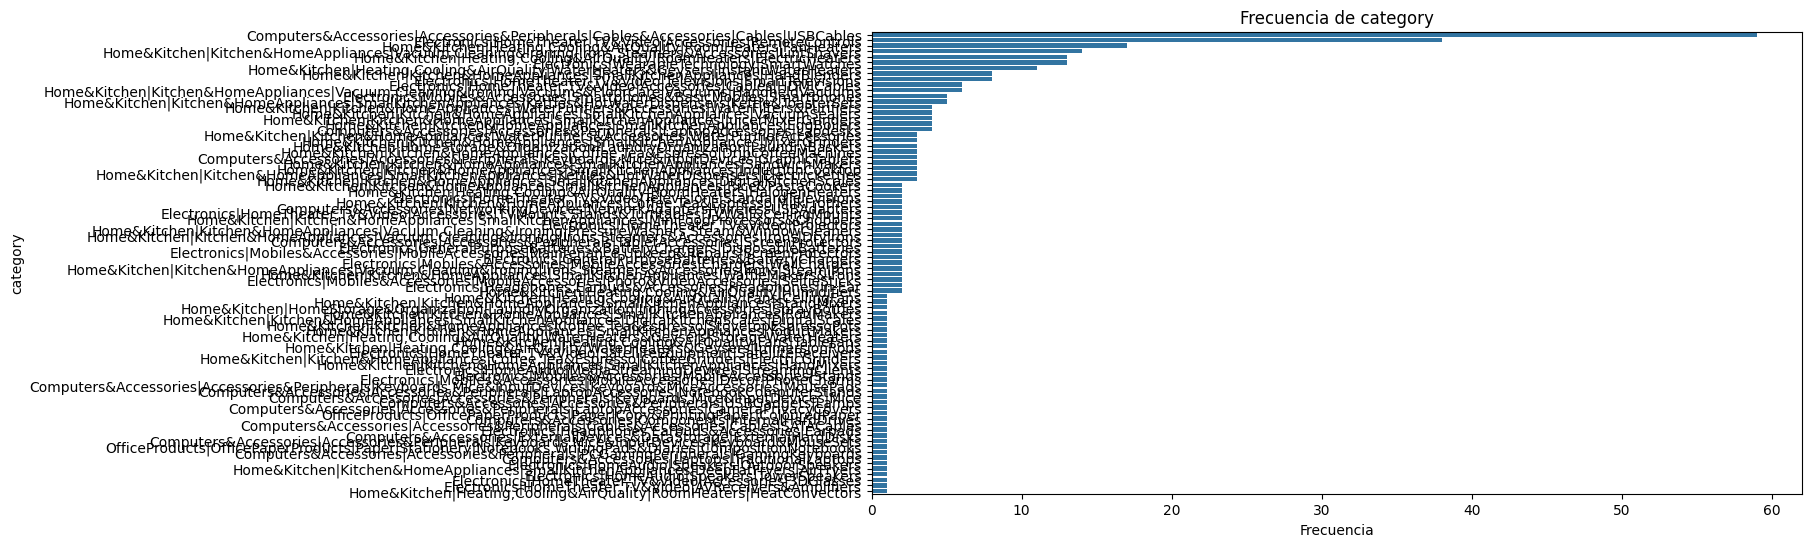

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12289 (\N{IDEOGRAPHIC COMMA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


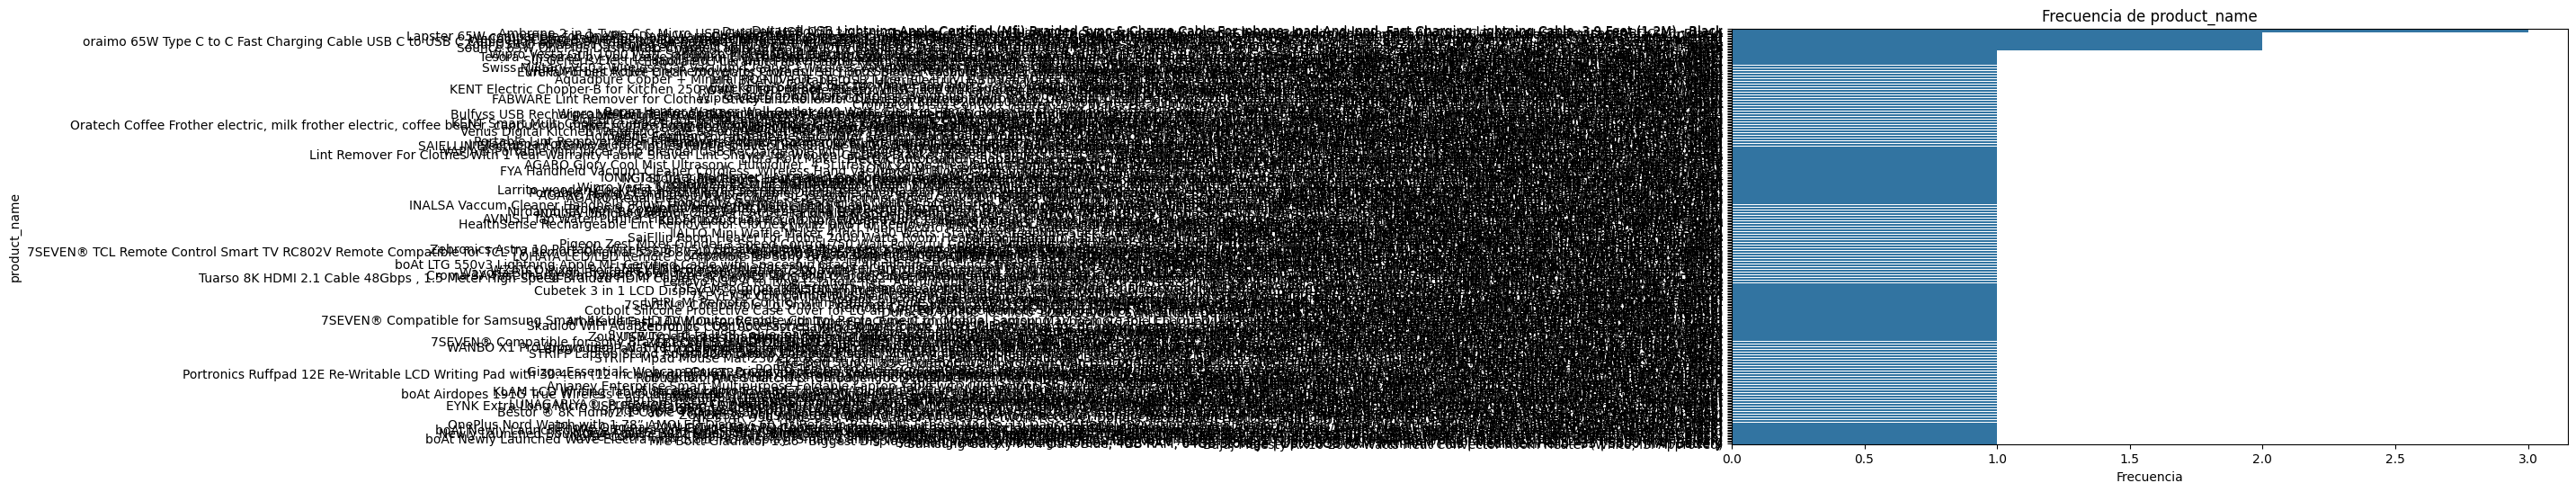

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129304 (\N{SIGN OF THE HORNS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127995 (\N{EMOJI MODIFIER FITZPATRICK TYPE-1-2}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


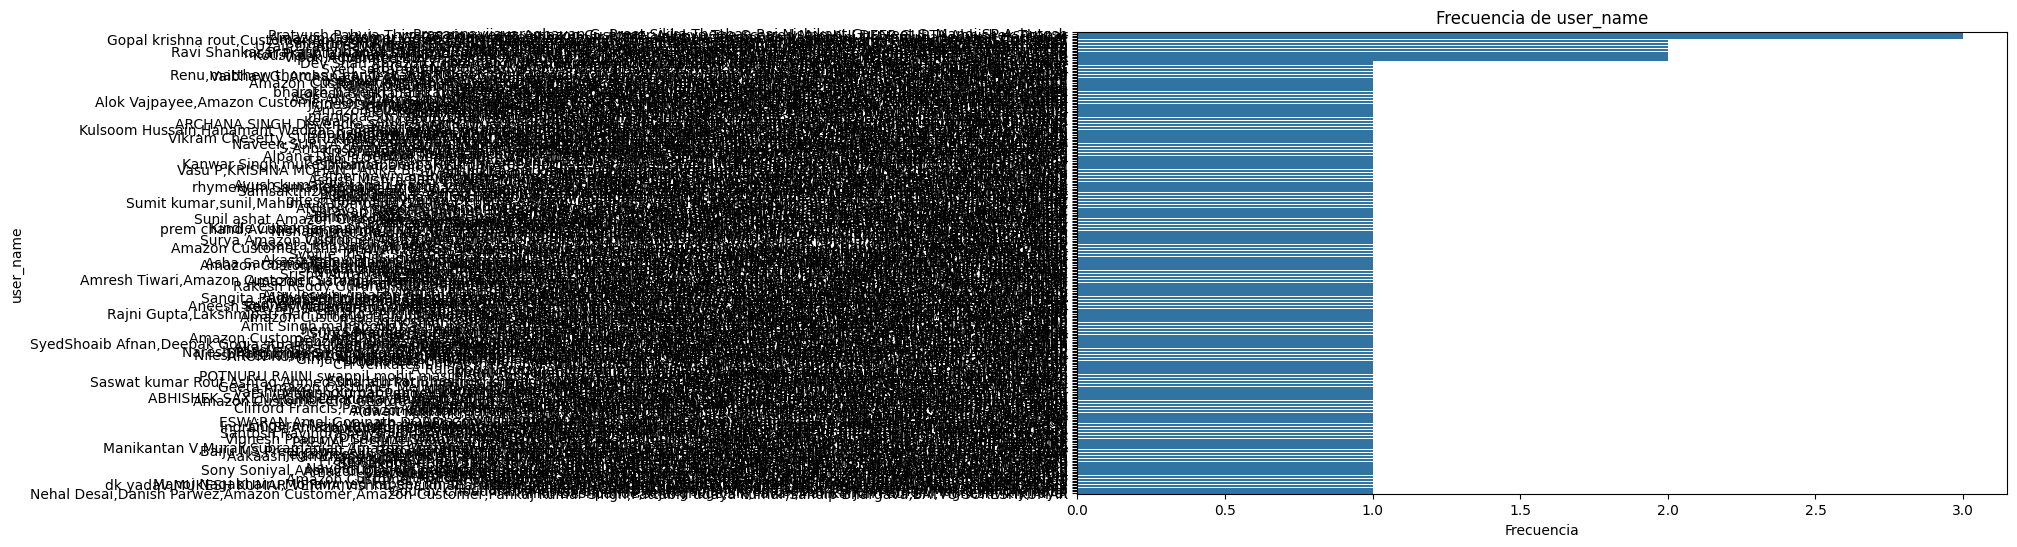

In [17]:
columnas_categoricas = ['category', 'product_name', 'user_name']

for col in columnas_categoricas:
    plt.figure(figsize=(12, 6))
    sns.countplot(y=df[col], order=df[col].value_counts().index)
    plt.title(f'Frecuencia de {col}')
    plt.xlabel('Frecuencia')
    plt.ylabel(col)
    plt.show()

**EDA para variables númericas**

       discounted_price  actual_price  discount_percentage      rating  \
count               0.0           0.0                  0.0  325.000000   
mean                NaN           NaN                  NaN    3.988000   
std                 NaN           NaN                  NaN    0.398853   
min                 NaN           NaN                  NaN    2.000000   
25%                 NaN           NaN                  NaN    3.800000   
50%                 NaN           NaN                  NaN    4.100000   
75%                 NaN           NaN                  NaN    4.300000   
max                 NaN           NaN                  NaN    5.000000   

       rating_count  
count    326.000000  
mean     348.217791  
std      268.041590  
min        2.000000  
25%      119.000000  
50%      293.000000  
75%      544.000000  
max      992.000000  


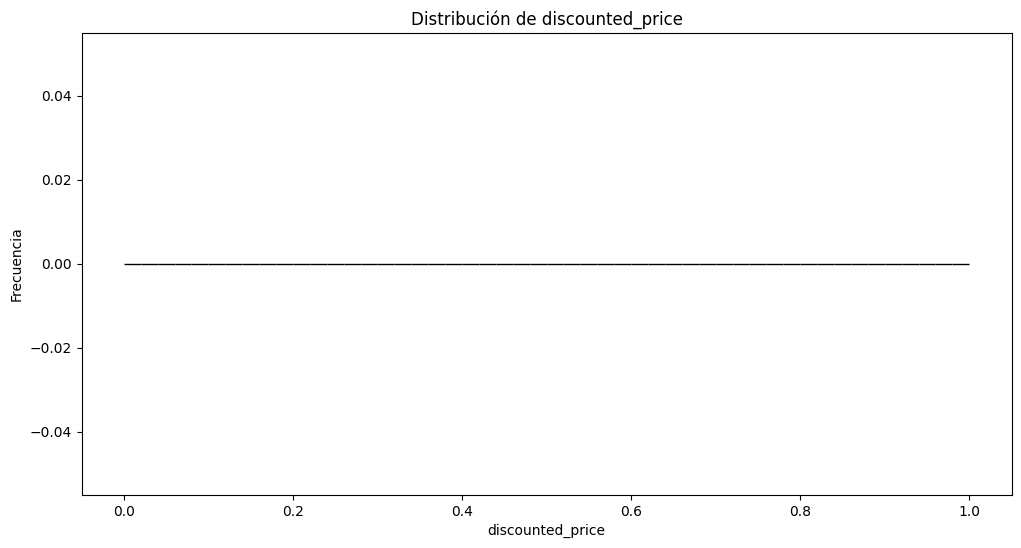

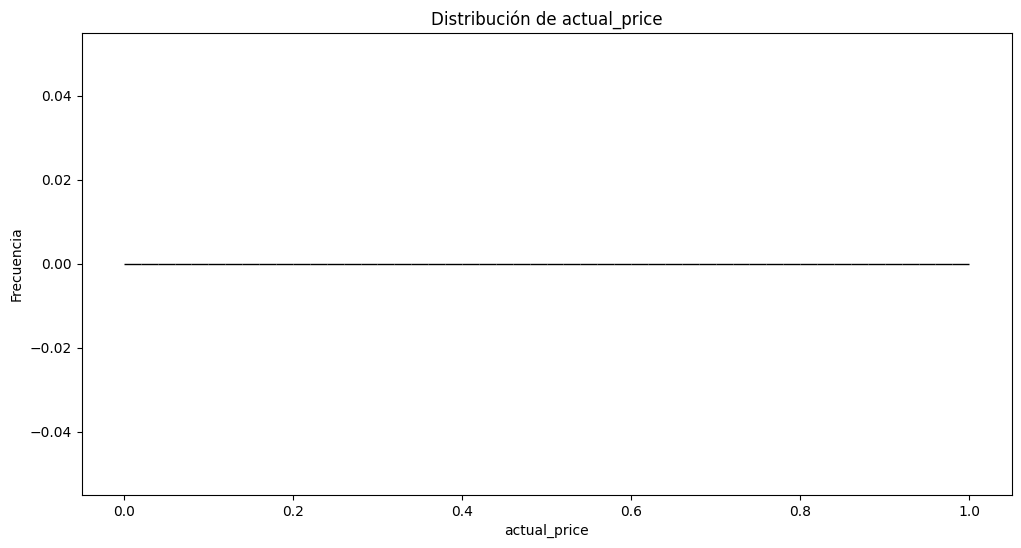

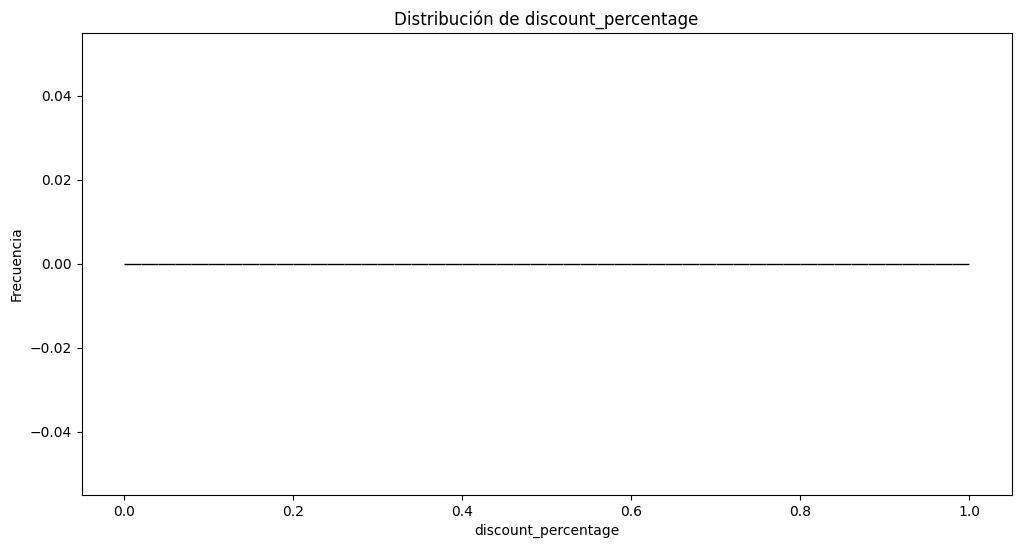

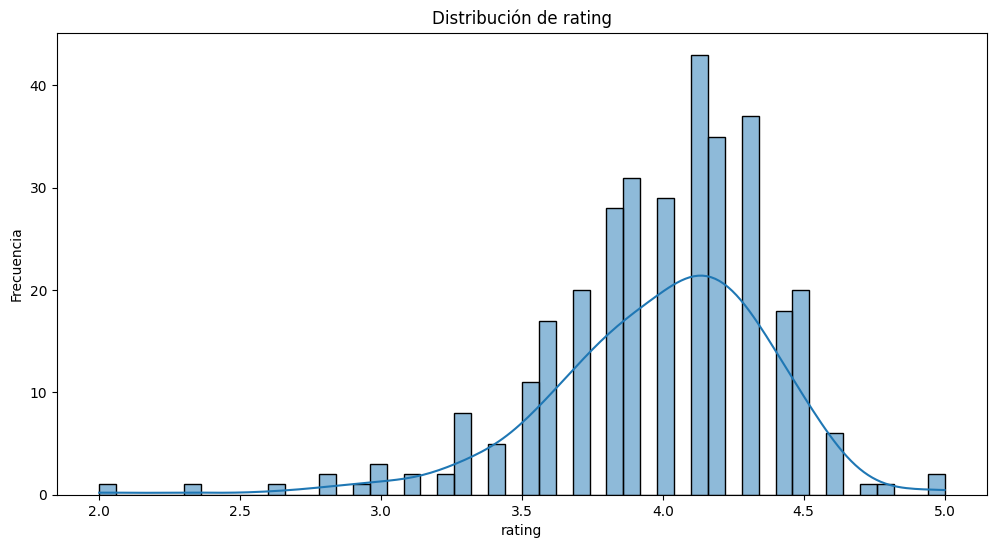

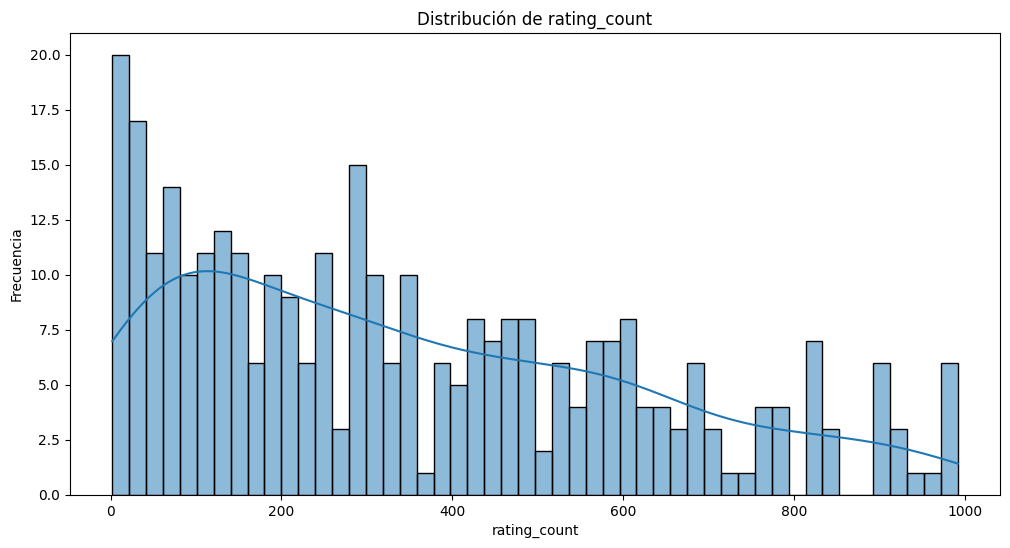

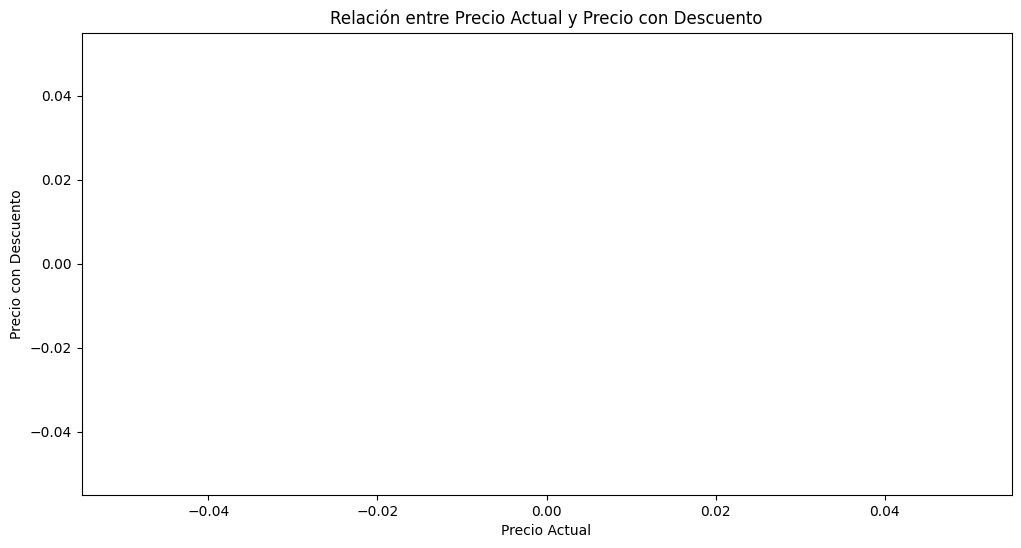

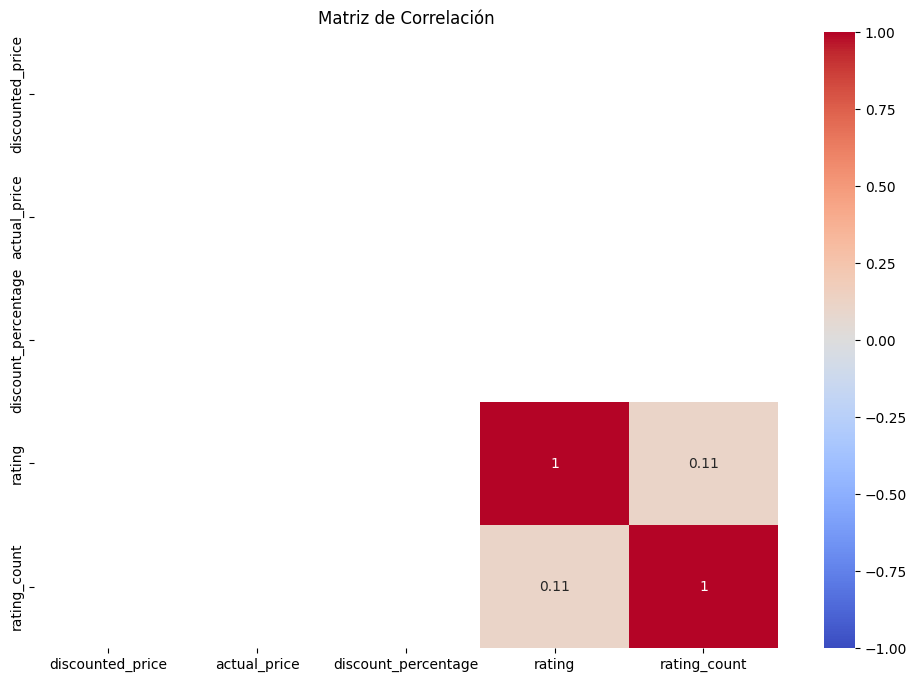

In [18]:
# Descripción estadística de las variables numéricas
print(df[['discounted_price', 'actual_price', 'discount_percentage', 'rating', 'rating_count']].describe())

# Distribución de Variables Numéricas
numerical_columns = ['discounted_price', 'actual_price', 'discount_percentage', 'rating', 'rating_count']

for col in numerical_columns:
    plt.figure(figsize=(12, 6))
    sns.histplot(df[col], bins=50, kde=True)
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.show()

# Relación entre Variables Numéricas
plt.figure(figsize=(12, 6))
sns.scatterplot(x='actual_price', y='discounted_price', data=df)
plt.title('Relación entre Precio Actual y Precio con Descuento')
plt.xlabel('Precio Actual')
plt.ylabel('Precio con Descuento')
plt.show()

# Matriz de Correlación
plt.figure(figsize=(12, 8))
correlation_matrix = df[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlación')
plt.show()

In [26]:
def estadisticos_cont(num):
    # Calculamos describe
    estadisticos = num.describe().T

    # Añadimos la mediana como una nueva columna
    estadisticos['median'] = num.median()

    # Reordenamos para que la mediana esté al lado de la media
    # new_order = ['count', 'mean', 'median', 'std', 'min', '25%', '50%', '75%', 'max']
    estadisticos = estadisticos[['count', 'mean', 'median', 'std', 'min', '25%', '50%', '75%', 'max']]

    # Lo retornamos
    return estadisticos

In [29]:
numerical_columns = ['discounted_price', 'actual_price', 'discount_percentage', 'rating', 'rating_count']
estadisticos = estadisticos_cont(df[numerical_columns])
print(estadisticos)

                     count        mean  median         std  min    25%    50%  \
discounted_price       0.0         NaN     NaN         NaN  NaN    NaN    NaN   
actual_price           0.0         NaN     NaN         NaN  NaN    NaN    NaN   
discount_percentage    0.0         NaN     NaN         NaN  NaN    NaN    NaN   
rating               325.0    3.988000     4.1    0.398853  2.0    3.8    4.1   
rating_count         326.0  348.217791   293.0  268.041590  2.0  119.0  293.0   

                       75%    max  
discounted_price       NaN    NaN  
actual_price           NaN    NaN  
discount_percentage    NaN    NaN  
rating                 4.3    5.0  
rating_count         544.0  992.0  


**GENERAMOS INSIGHTS**

**PREPARAMOS LOS DATOS PARA EL MODELO**

In [47]:
# Convertimos las variables categóricas a dummy variables
df = pd.get_dummies(df, columns=['category', 'product_name', 'user_name'], drop_first=True)

# Seleccionamos las características y el objetivo
X = df.drop(columns=['rating_count', 'product_id', 'product_name', 'user_id', 'user_name', 'review_id', 'review_title', 'review_content', 'img_link', 'product_link', 'about_product'])
y = df['rating_count']

# Dividimos los datos en conjunto de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

KeyError: "None of [Index(['category', 'product_name', 'user_name'], dtype='object')] are in the [columns]"

In [50]:
df = pd.read_csv('amazon.csv')

# Convertir columnas numéricas que están en formato de string
df['discounted_price'] = pd.to_numeric(df['discounted_price'], errors='coerce')
df['actual_price'] = pd.to_numeric(df['actual_price'], errors='coerce')
df['discount_percentage'] = pd.to_numeric(df['discount_percentage'], errors='coerce')
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
df['rating_count'] = pd.to_numeric(df['rating_count'], errors='coerce')

# Manejar valores faltantes
df = df.dropna(subset=['rating_count'])

# Imprimir los nombres de las columnas para verificar
print("Columnas del DataFrame:")
print(df.columns)

# Lista de columnas que deseas convertir a dummy variables
columns_to_convert = ['category', 'product_name', 'user_name']

# Verificar que las columnas existen
missing_columns = [col for col in columns_to_convert if col not in df.columns]
if missing_columns:
    print(f"Las siguientes columnas están ausentes en el DataFrame: {missing_columns}")
else:
    # Convertimos las variables categóricas a dummy variables
    df = pd.get_dummies(df, columns=columns_to_convert, drop_first=True)
    print("Variables categóricas convertidas a dummy variables correctamente.")

    # Seleccionamos las características y el objetivo
    X = df.drop(columns=['rating_count', 'product_id', 'user_id', 'review_id', 'review_title', 'review_content', 'img_link', 'product_link', 'about_product'])
    y = df['rating_count']

    print(X.head())
    print(y.head())

Columnas del DataFrame:
Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')
Variables categóricas convertidas a dummy variables correctamente.
    discounted_price  actual_price  discount_percentage  rating  \
20               NaN           NaN                  NaN     4.5   
28               NaN           NaN                  NaN     4.4   
32               NaN           NaN                  NaN     4.3   
33               NaN           NaN                  NaN     4.3   
37               NaN           NaN                  NaN     4.0   

    category_Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables  \
20                                               True                                            
28              

**DIVIDIMOS LOS DATOS EN UN CONJUNTO DE ENTRENAMIENTO Y DE PRUEBA**

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**ENTRENANDO EL MODELO**

In [53]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

ValueError: Input X contains NaN.
RandomForestRegressor does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

**PREDECIMOS Y EVALUAMOS EL MODELO**

In [ ]:
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

In [54]:
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')

NameError: name 'mae' is not defined

**PREDECIMOS LA DEMANDA DE PRODUCTOS**

In [ ]:
# Predicción en nuevos datos
new_data = X_test.iloc[:5]  # Usamos algunas filas del conjunto de prueba como ejemplo
predictions = model.predict(new_data)

print("Predicciones de demanda para nuevos datos:")
print(predictions)